In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import silhouette_score

# Fixer la graine pour la reproductibilité
np.random.seed(42)

# Étape 1: Générer des données en 16D

# Class 1 - Distribution trimodale (122 échantillons)
class1_samples = 122
means_class1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Mean for 1st component
                          [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],  # Mean for 2nd component
                          [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])  # Mean for 3rd component
std_devs_class1 = 0.5  # Écart type commun

# Fixer le nombre d'échantillons par composant
samples_per_component = [class1_samples // 3] * 3  # Diviser également
for i in range(class1_samples % 3):  # Gérer le reste
    samples_per_component[i] += 1

# Créer des échantillons pour Class 1
class1_data = np.concatenate([
    np.random.normal(mean, std_devs_class1, (samples_per_component[i], 16)) for i, mean in enumerate(means_class1)
])

# Vérification des dimensions
print("Dimensions des données de Class 1:", class1_data.shape)


# Class 2 - Distribution bimodale asymétrique (370 échantillons)
class2_samples = 370
# Distribution normale asymétrique (skewed)
skewness_param = 5  # Contrôle l'asymétrie de la distribution
skewed_data = np.concatenate([
    skewnorm.rvs(a=skewness_param, loc=1, scale=0.8, size=(class2_samples // 2, 16)),
    np.random.normal(3, 0.5, (class2_samples // 2, 16))  # Composante normale
])

# Créer les données pour Class 2
class2_data = skewed_data

# Vérification des dimensions
print("Dimensions des données de Class 1:", class1_data.shape)
print("Dimensions des données de Class 2:", class2_data.shape)


Dimensions des données de Class 1: (122, 16)
Dimensions des données de Class 1: (122, 16)
Dimensions des données de Class 2: (370, 16)


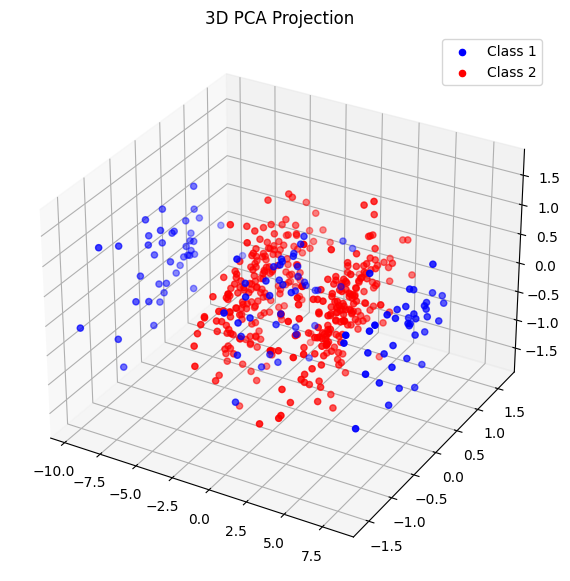

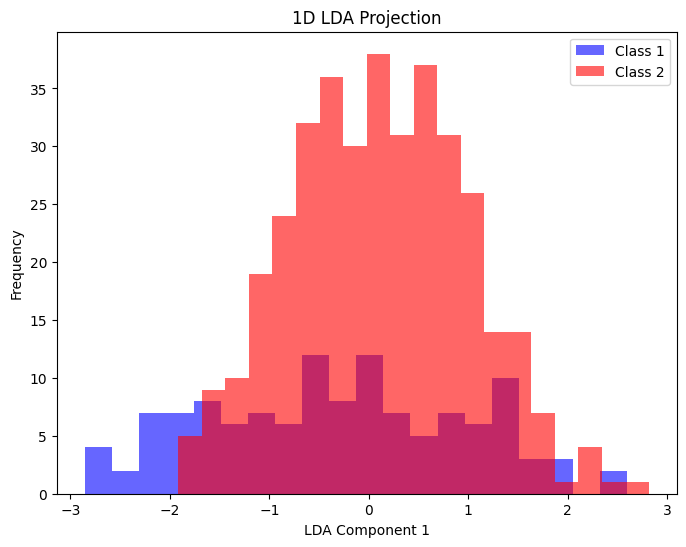

Silhouette Score: 0.23
Silhouette Score indicates moderately overlapping points.


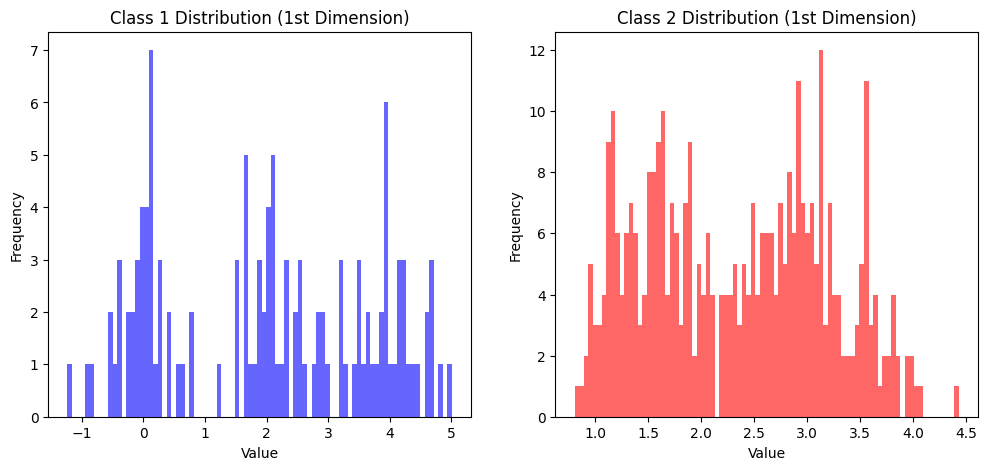

In [ ]:
# Étape 2: Appliquer PCA
# Combiner les données des deux classes


# Label data for silhouette scoring
data = np.vstack((class1_data, class2_data))
labels = np.array([0] * class1_data.shape[0] + [1] * class2_data.shape[0])


pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)

# Plot 3D projection
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[labels == 0, 0], pca_data[labels == 0, 1], pca_data[labels == 0, 2], color='blue', label='Class 1')
ax.scatter(pca_data[labels == 1, 0], pca_data[labels == 1, 1], pca_data[labels == 1, 2], color='red', label='Class 2')
ax.set_title('3D PCA Projection')
plt.legend()
plt.show()

# étape 3: LDA pour une Visualization D1
lda = LDA(n_components=1)  # Set to 1 due to only two classes
lda_data = lda.fit_transform(data, labels)

# Plot 1D projection
plt.figure(figsize=(8, 6))
plt.hist(lda_data[labels == 0], bins=20, alpha=0.6, color='blue', label='Class 1')
plt.hist(lda_data[labels == 1], bins=20, alpha=0.6, color='red', label='Class 2')
plt.title('1D LDA Projection')
plt.xlabel('LDA Component 1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Silhouette Score & Interpretation
sil_score = silhouette_score(data, labels)
print(f"Silhouette Score: {sil_score:.2f}")

# Interpretation
if sil_score < 0.2:
    print("Silhouette Score close to 0 indicates a lot of overlapping points.")
    print("Projecting further to 1D may result in even greater overlap.")
elif sil_score < 0.5:
    print("Silhouette Score indicates moderately overlapping points.")
else:
    print("Good separation, projection to lower dimensions likely to retain class separability.")

# Step 4: Histograms of Original Data (Dimension-wise)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, data_class in enumerate([class1_data, class2_data]):
    axes[i].hist(data_class[:, 0], bins=85, alpha=0.6, label=f'Class {i+1}', color='blue' if i == 0 else 'red')
    axes[i].set_title(f'Class {i+1} Distribution (1st Dimension)')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.show()

Dimensions des données de la Classe 1: (122, 16)
Dimensions des données de la Classe 1: (122, 16)
Dimensions des données de la Classe 2: (370, 16)


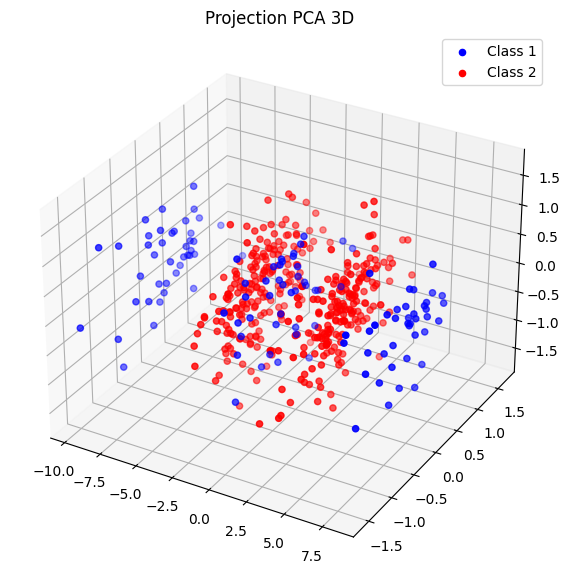

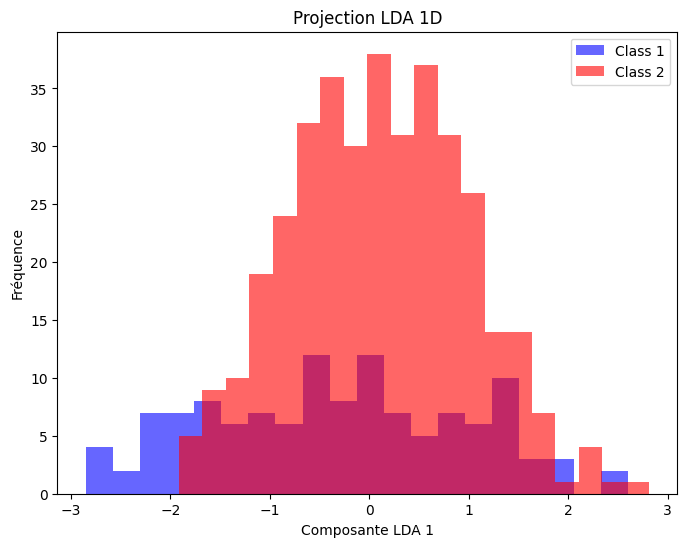

Score de Silhouette : 0.23
Score de silhouette indiquant un chevauchement modéré entre les points.


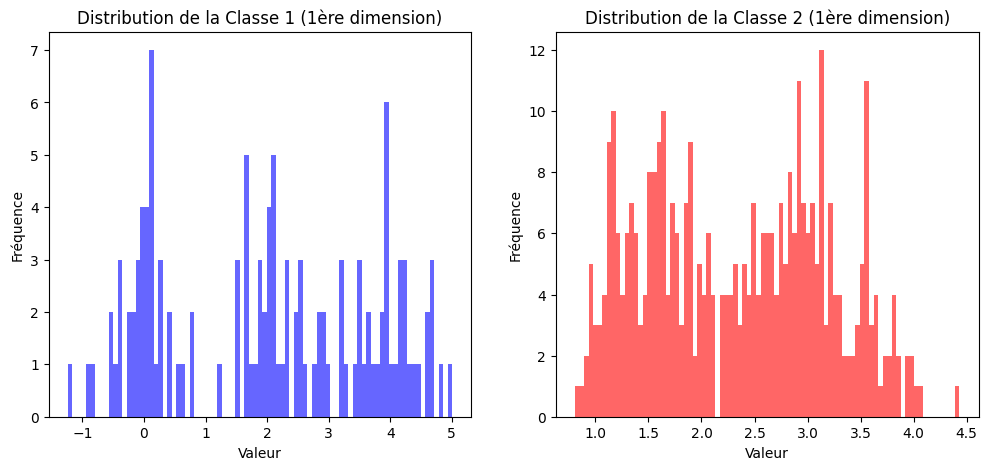

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import silhouette_score

# Fixer la graine pour garantir la reproductibilité
np.random.seed(42)

# Étape 1: Générer des données en 16 dimensions

# Classe 1 - Distribution trimodale (122 échantillons)
class1_samples = 122
# Moyennes pour chaque composant de la distribution trimodale de la classe 1
means_class1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Moyenne pour le 1er composant
                         [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],  # Moyenne pour le 2ème composant
                         [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])  # Moyenne pour le 3ème composant
std_devs_class1 = 0.5  # Écart type commun pour chaque composant de classe 1

# Déterminer le nombre d'échantillons par composant
samples_per_component = [class1_samples // 3] * 3  # Division équitable des échantillons
for i in range(class1_samples % 3):  # Gérer les échantillons restants
    samples_per_component[i] += 1

# Créer les échantillons pour la Classe 1
class1_data = np.concatenate([
    np.random.normal(mean, std_devs_class1, (samples_per_component[i], 16)) for i, mean in enumerate(means_class1)
])

# Vérification des dimensions de la Classe 1
print("Dimensions des données de la Classe 1:", class1_data.shape)


# Classe 2 - Distribution bimodale asymétrique (370 échantillons)
class2_samples = 370
# Distribution normale asymétrique pour la classe 2
skewness_param = 5  # Contrôle l'asymétrie de la distribution
skewed_data = np.concatenate([
    skewnorm.rvs(a=skewness_param, loc=1, scale=0.8, size=(class2_samples // 2, 16)),
    np.random.normal(3, 0.5, (class2_samples // 2, 16))  # Deuxième composante normale
])

# Créer les données pour la Classe 2
class2_data = skewed_data

# Vérification des dimensions des classes
print("Dimensions des données de la Classe 1:", class1_data.shape)
print("Dimensions des données de la Classe 2:", class2_data.shape)


# Étape 2: Appliquer la PCA
# Combiner les données des deux classes
data = np.vstack((class1_data, class2_data))
labels = np.array([0] * class1_data.shape[0] + [1] * class2_data.shape[0])

pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)

# Visualisation 3D de la projection PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[labels == 0, 0], pca_data[labels == 0, 1], pca_data[labels == 0, 2], color='blue', label='Class 1')
ax.scatter(pca_data[labels == 1, 0], pca_data[labels == 1, 1], pca_data[labels == 1, 2], color='red', label='Class 2')
ax.set_title('Projection PCA 3D')
plt.legend()
plt.show()

# Étape 3: Appliquer la LDA pour une visualisation en 1D
lda = LDA(n_components=1)  # Fixé à 1 en raison des deux classes
lda_data = lda.fit_transform(data, labels)

# Visualisation de la projection LDA 1D
plt.figure(figsize=(8, 6))
plt.hist(lda_data[labels == 0], bins=20, alpha=0.6, color='blue', label='Class 1')
plt.hist(lda_data[labels == 1], bins=20, alpha=0.6, color='red', label='Class 2')
plt.title('Projection LDA 1D')
plt.xlabel('Composante LDA 1')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

# Calcul du Silhouette Score et interprétation
sil_score = silhouette_score(data, labels)
print(f"Score de Silhouette : {sil_score:.2f}")

# Interprétation en fonction du score de silhouette
if sil_score < 0.2:
    print("Score de silhouette proche de 0, indiquant un fort chevauchement entre les points.")
    print("La projection en 1D pourrait intensifier ce chevauchement.")
elif sil_score < 0.5:
    print("Score de silhouette indiquant un chevauchement modéré entre les points.")
else:
    print("Bonne séparation, la projection en dimensions inférieures est susceptible de maintenir la séparabilité des classes.")

# Étape 4: Histogrammes des données d'origine (par dimension)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, data_class in enumerate([class1_data, class2_data]):
    axes[i].hist(data_class[:, 0], bins=85, alpha=0.6, label=f'Class {i+1}', color='blue' if i == 0 else 'red')
    axes[i].set_title(f'Distribution de la Classe {i+1} (1ère dimension)')
    axes[i].set_xlabel('Valeur')
    axes[i].set_ylabel('Fréquence')
plt.show()

# Expérimenter trois types de 'pas' pour l'histogramme :
# - Petit pas (ex. 0.1)
# - Grand pas (ex. 1.0)
# - Calculer le pas optimal automatiquement basé sur la largeur de bande
# et tester sur les données projetées de la LDA pour voir l'impact


<ipython-input-8-1104197b8245>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(lda_data[labels == 0], bins=np.arange(min(lda_data), max(lda_data) + petit_pas, petit_pas),
<ipython-input-8-1104197b8245>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(lda_data[labels == 1], bins=np.arange(min(lda_data), max(lda_data) + petit_pas, petit_pas),
<ipython-input-8-1104197b8245>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(lda_data[labels

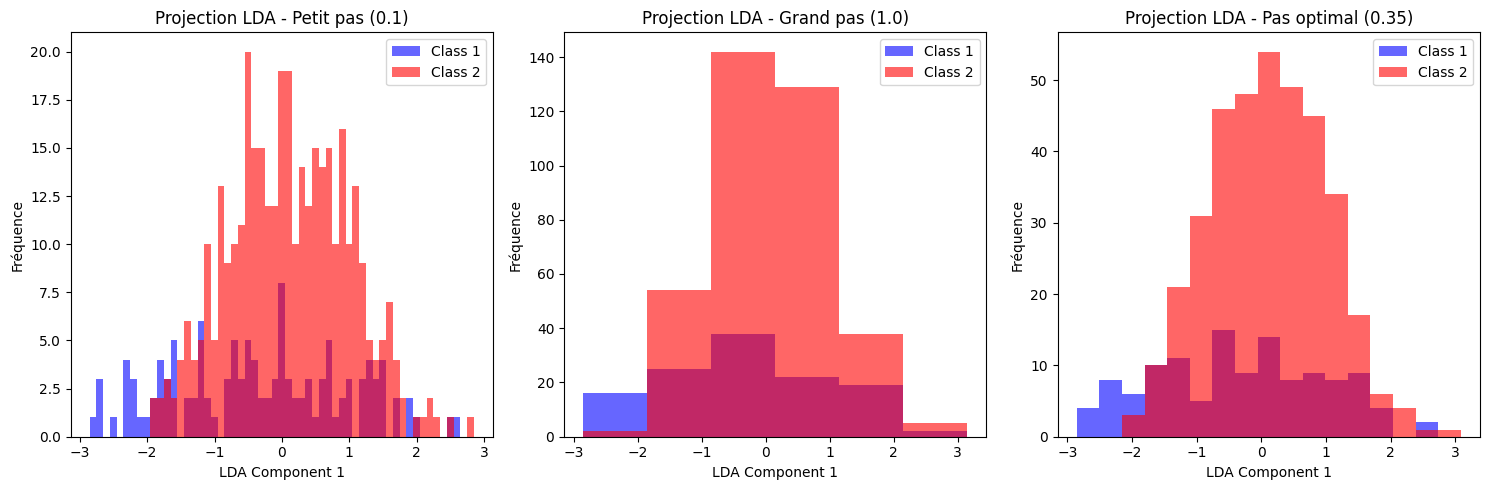

In [ ]:
# Petits et grands pas prédéfinis
petit_pas = 0.1
grand_pas = 1.0

# Fonction pour calculer le pas optimal avec la méthode de Freedman-Diaconis
def calculer_pas_optimal(data):
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25  # Calcul de l'écart interquartile
    n = len(data)  # Nombre d'échantillons
    pas_optimal = (2 * iqr) / np.cbrt(n)  # Formule de Freedman-Diaconis
    return pas_optimal

# Calculer le pas optimal pour les données projetées de la LDA
pas_optimal = calculer_pas_optimal(lda_data)

# Créer et afficher les histogrammes avec les trois types de pas
plt.figure(figsize=(15, 5))

# Histogramme avec petit pas
plt.subplot(1, 3, 1)
plt.hist(lda_data[labels == 0], bins=np.arange(min(lda_data), max(lda_data) + petit_pas, petit_pas),
         alpha=0.6, color='blue', label='Class 1')
plt.hist(lda_data[labels == 1], bins=np.arange(min(lda_data), max(lda_data) + petit_pas, petit_pas),
         alpha=0.6, color='red', label='Class 2')
plt.title(f'Projection LDA - Petit pas ({petit_pas})')
plt.xlabel('LDA Component 1')
plt.ylabel('Fréquence')
plt.legend()

# Histogramme avec grand pas
plt.subplot(1, 3, 2)
plt.hist(lda_data[labels == 0], bins=np.arange(min(lda_data), max(lda_data) + grand_pas, grand_pas),
         alpha=0.6, color='blue', label='Class 1')
plt.hist(lda_data[labels == 1], bins=np.arange(min(lda_data), max(lda_data) + grand_pas, grand_pas),
         alpha=0.6, color='red', label='Class 2')
plt.title(f'Projection LDA - Grand pas ({grand_pas})')
plt.xlabel('LDA Component 1')
plt.ylabel('Fréquence')
plt.legend()

# Histogramme avec pas optimal
plt.subplot(1, 3, 3)
plt.hist(lda_data[labels == 0], bins=np.arange(min(lda_data), max(lda_data) + pas_optimal, pas_optimal),
         alpha=0.6, color='blue', label='Class 1')
plt.hist(lda_data[labels == 1], bins=np.arange(min(lda_data), max(lda_data) + pas_optimal, pas_optimal),
         alpha=0.6, color='red', label='Class 2')
plt.title(f'Projection LDA - Pas optimal ({pas_optimal:.2f})')
plt.xlabel('LDA Component 1')
plt.ylabel('Fréquence')
plt.legend()

# Afficher tous les histogrammes
plt.tight_layout()
plt.show()